In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
from keras.layers import Dense, Activation,Layer,Lambda
import seaborn as sns
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_decision_regions
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
import tensorflow as tf
import warnings
warnings.simplefilter('ignore')

In [2]:
df = pd.read_csv(r"C:\Users\surya\Downloads\gas_turbines.csv")

In [3]:
df1=df[['AT','AP','AH','TEY']]
df1.head()

,AT,AP,AH,TEY
0,6.8594,1007.9,96.799,114.70
1,6.7850,1008.4,97.118,114.72
2,6.8977,1008.8,95.939,114.71
3,7.0569,1009.2,95.249,114.72
4,7.3978,1009.7,95.150,114.72


In [4]:
df1.isnull().sum()

AT     0
AP     0
AH     0
TEY    0
dtype: int64

In [5]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
AT,15039.0,17.764381,7.574323,0.5223,11.408,18.186,23.8625,34.929
AP,15039.0,1013.199240,6.410760,985.8500,1008.900,1012.800,1016.9000,1034.200
AH,15039.0,79.124174,13.793439,30.3440,69.750,82.266,90.0435,100.200
TEY,15039.0,134.188464,15.829717,100.1700,127.985,133.780,140.8950,174.610


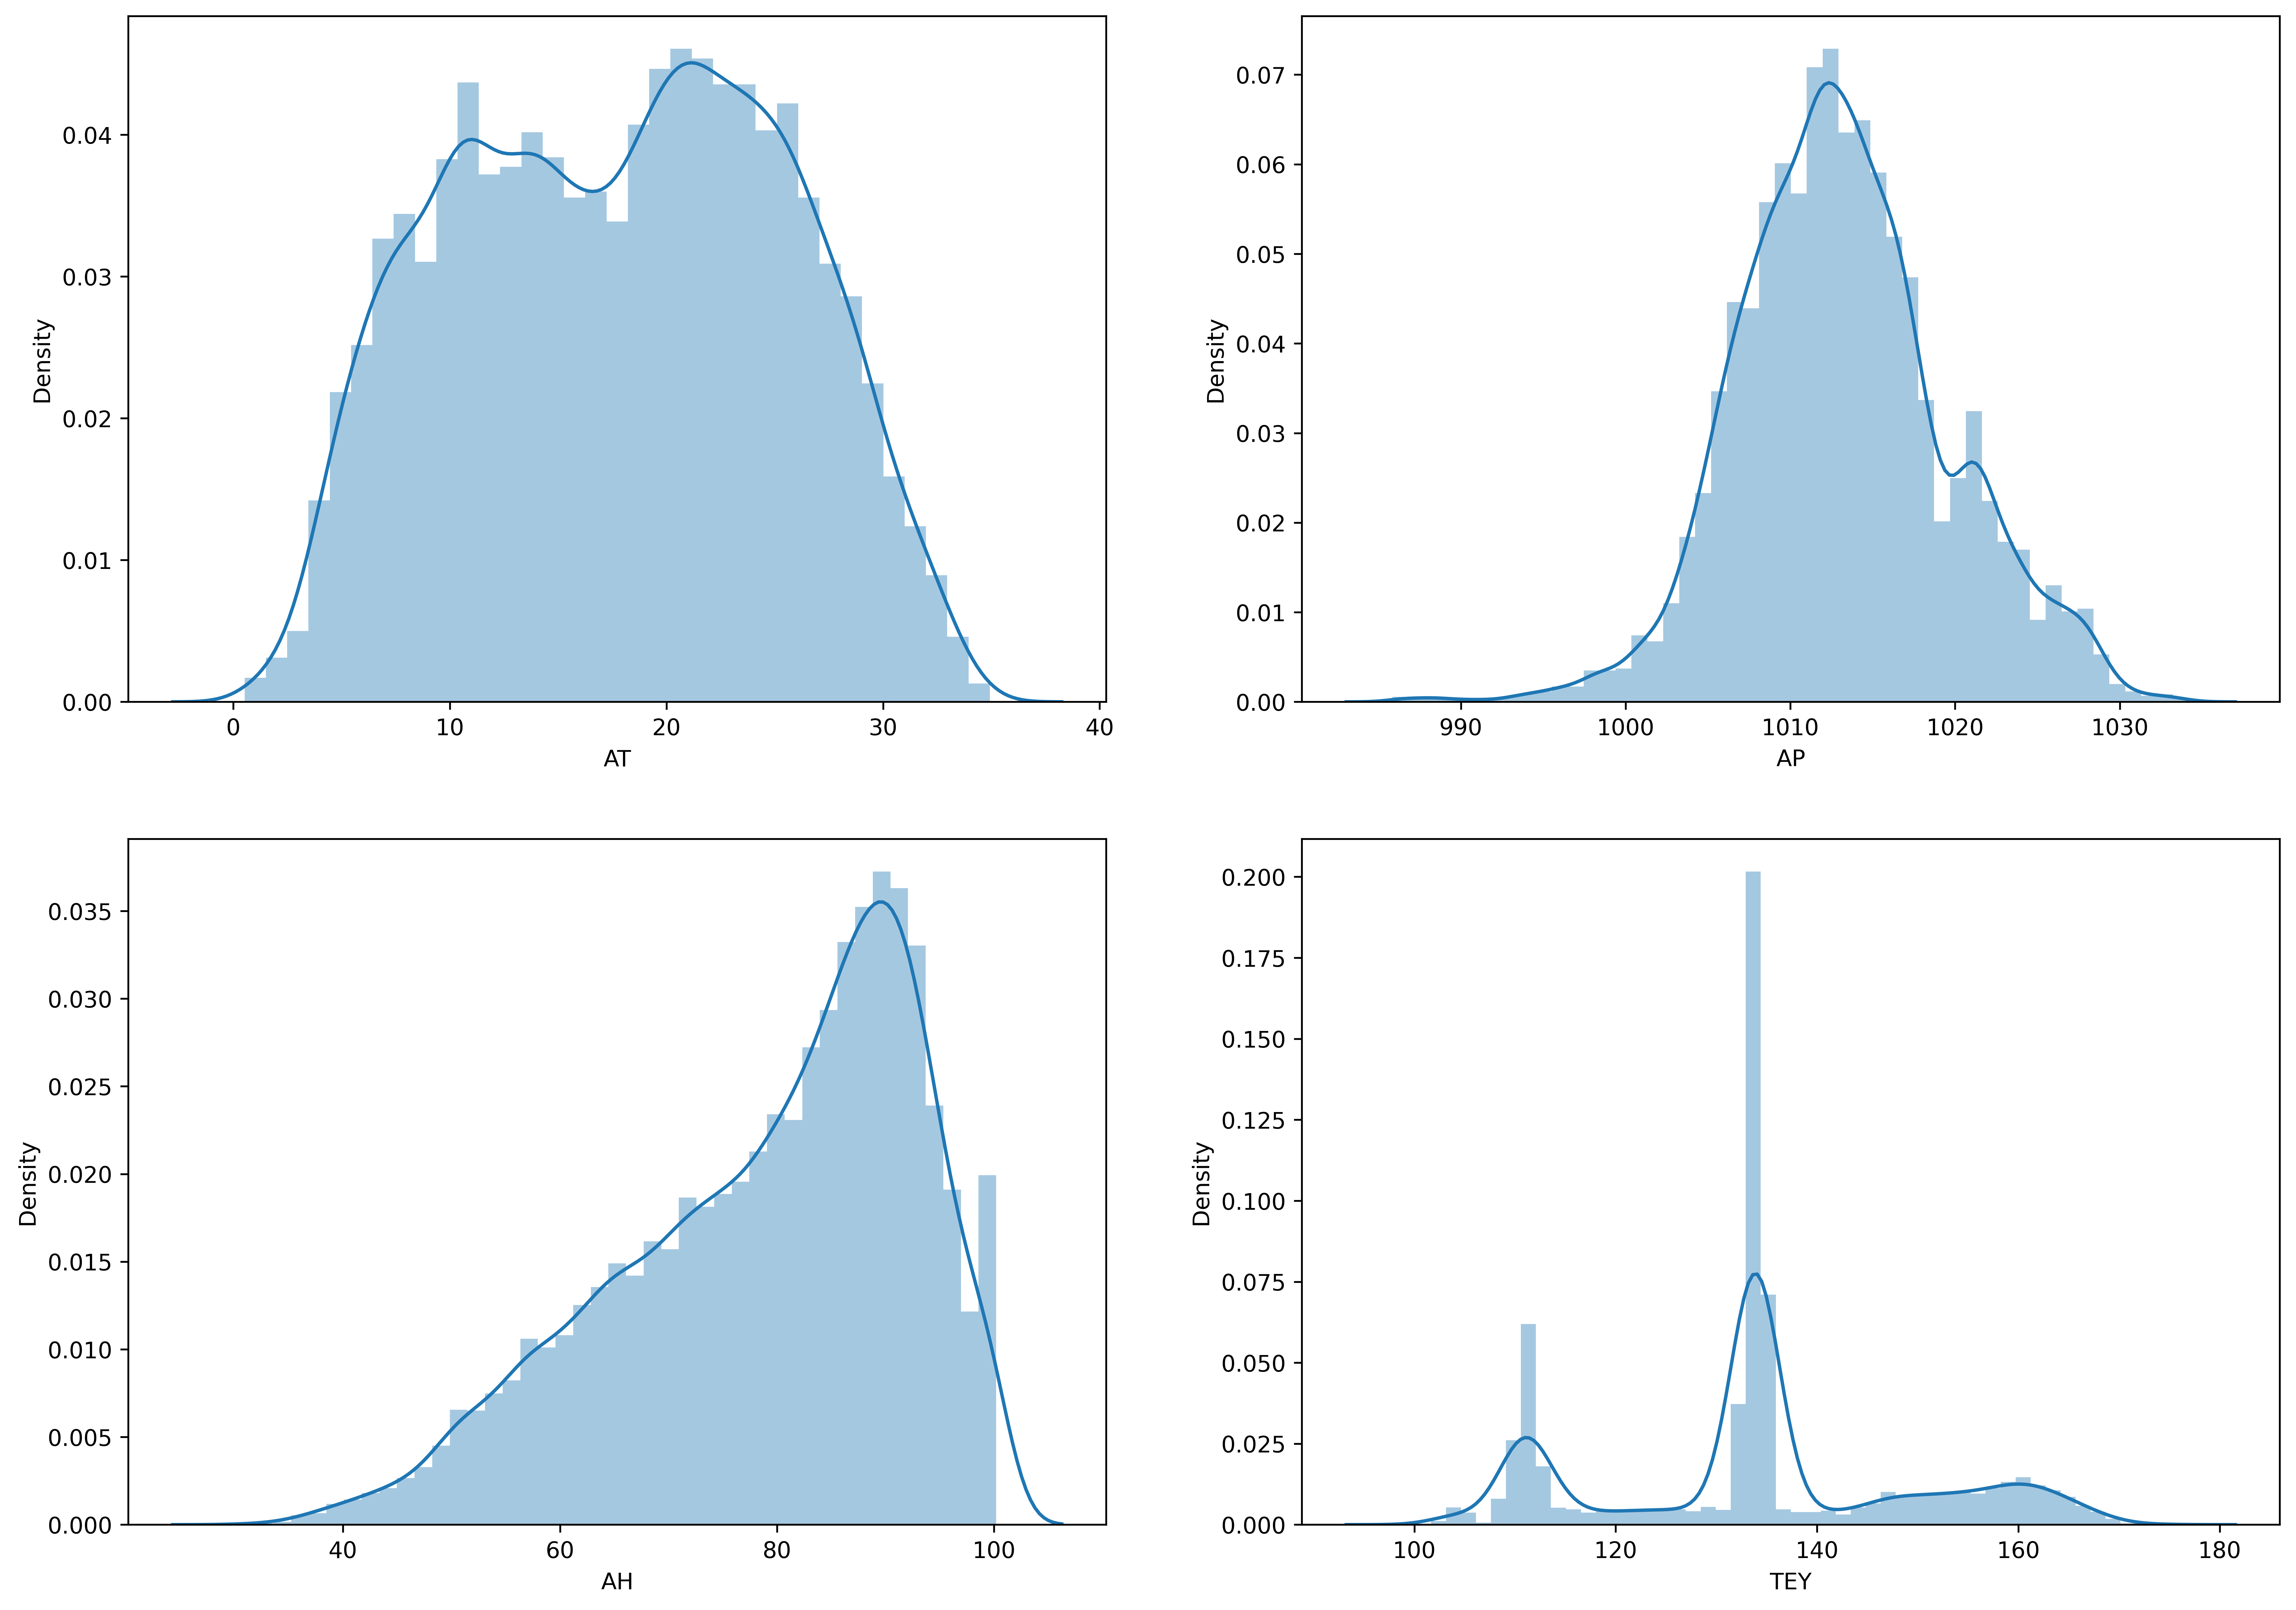

In [6]:
fig, ax = plt.subplots(2,2, figsize = (17,12),dpi=600)

sns.distplot(df.AT, ax = ax[0,0])
sns.distplot(df.AP, ax = ax[0,1])
sns.distplot(df.AH, ax = ax[1,0])
sns.distplot(df.TEY, ax = ax[1,1])
plt.show()

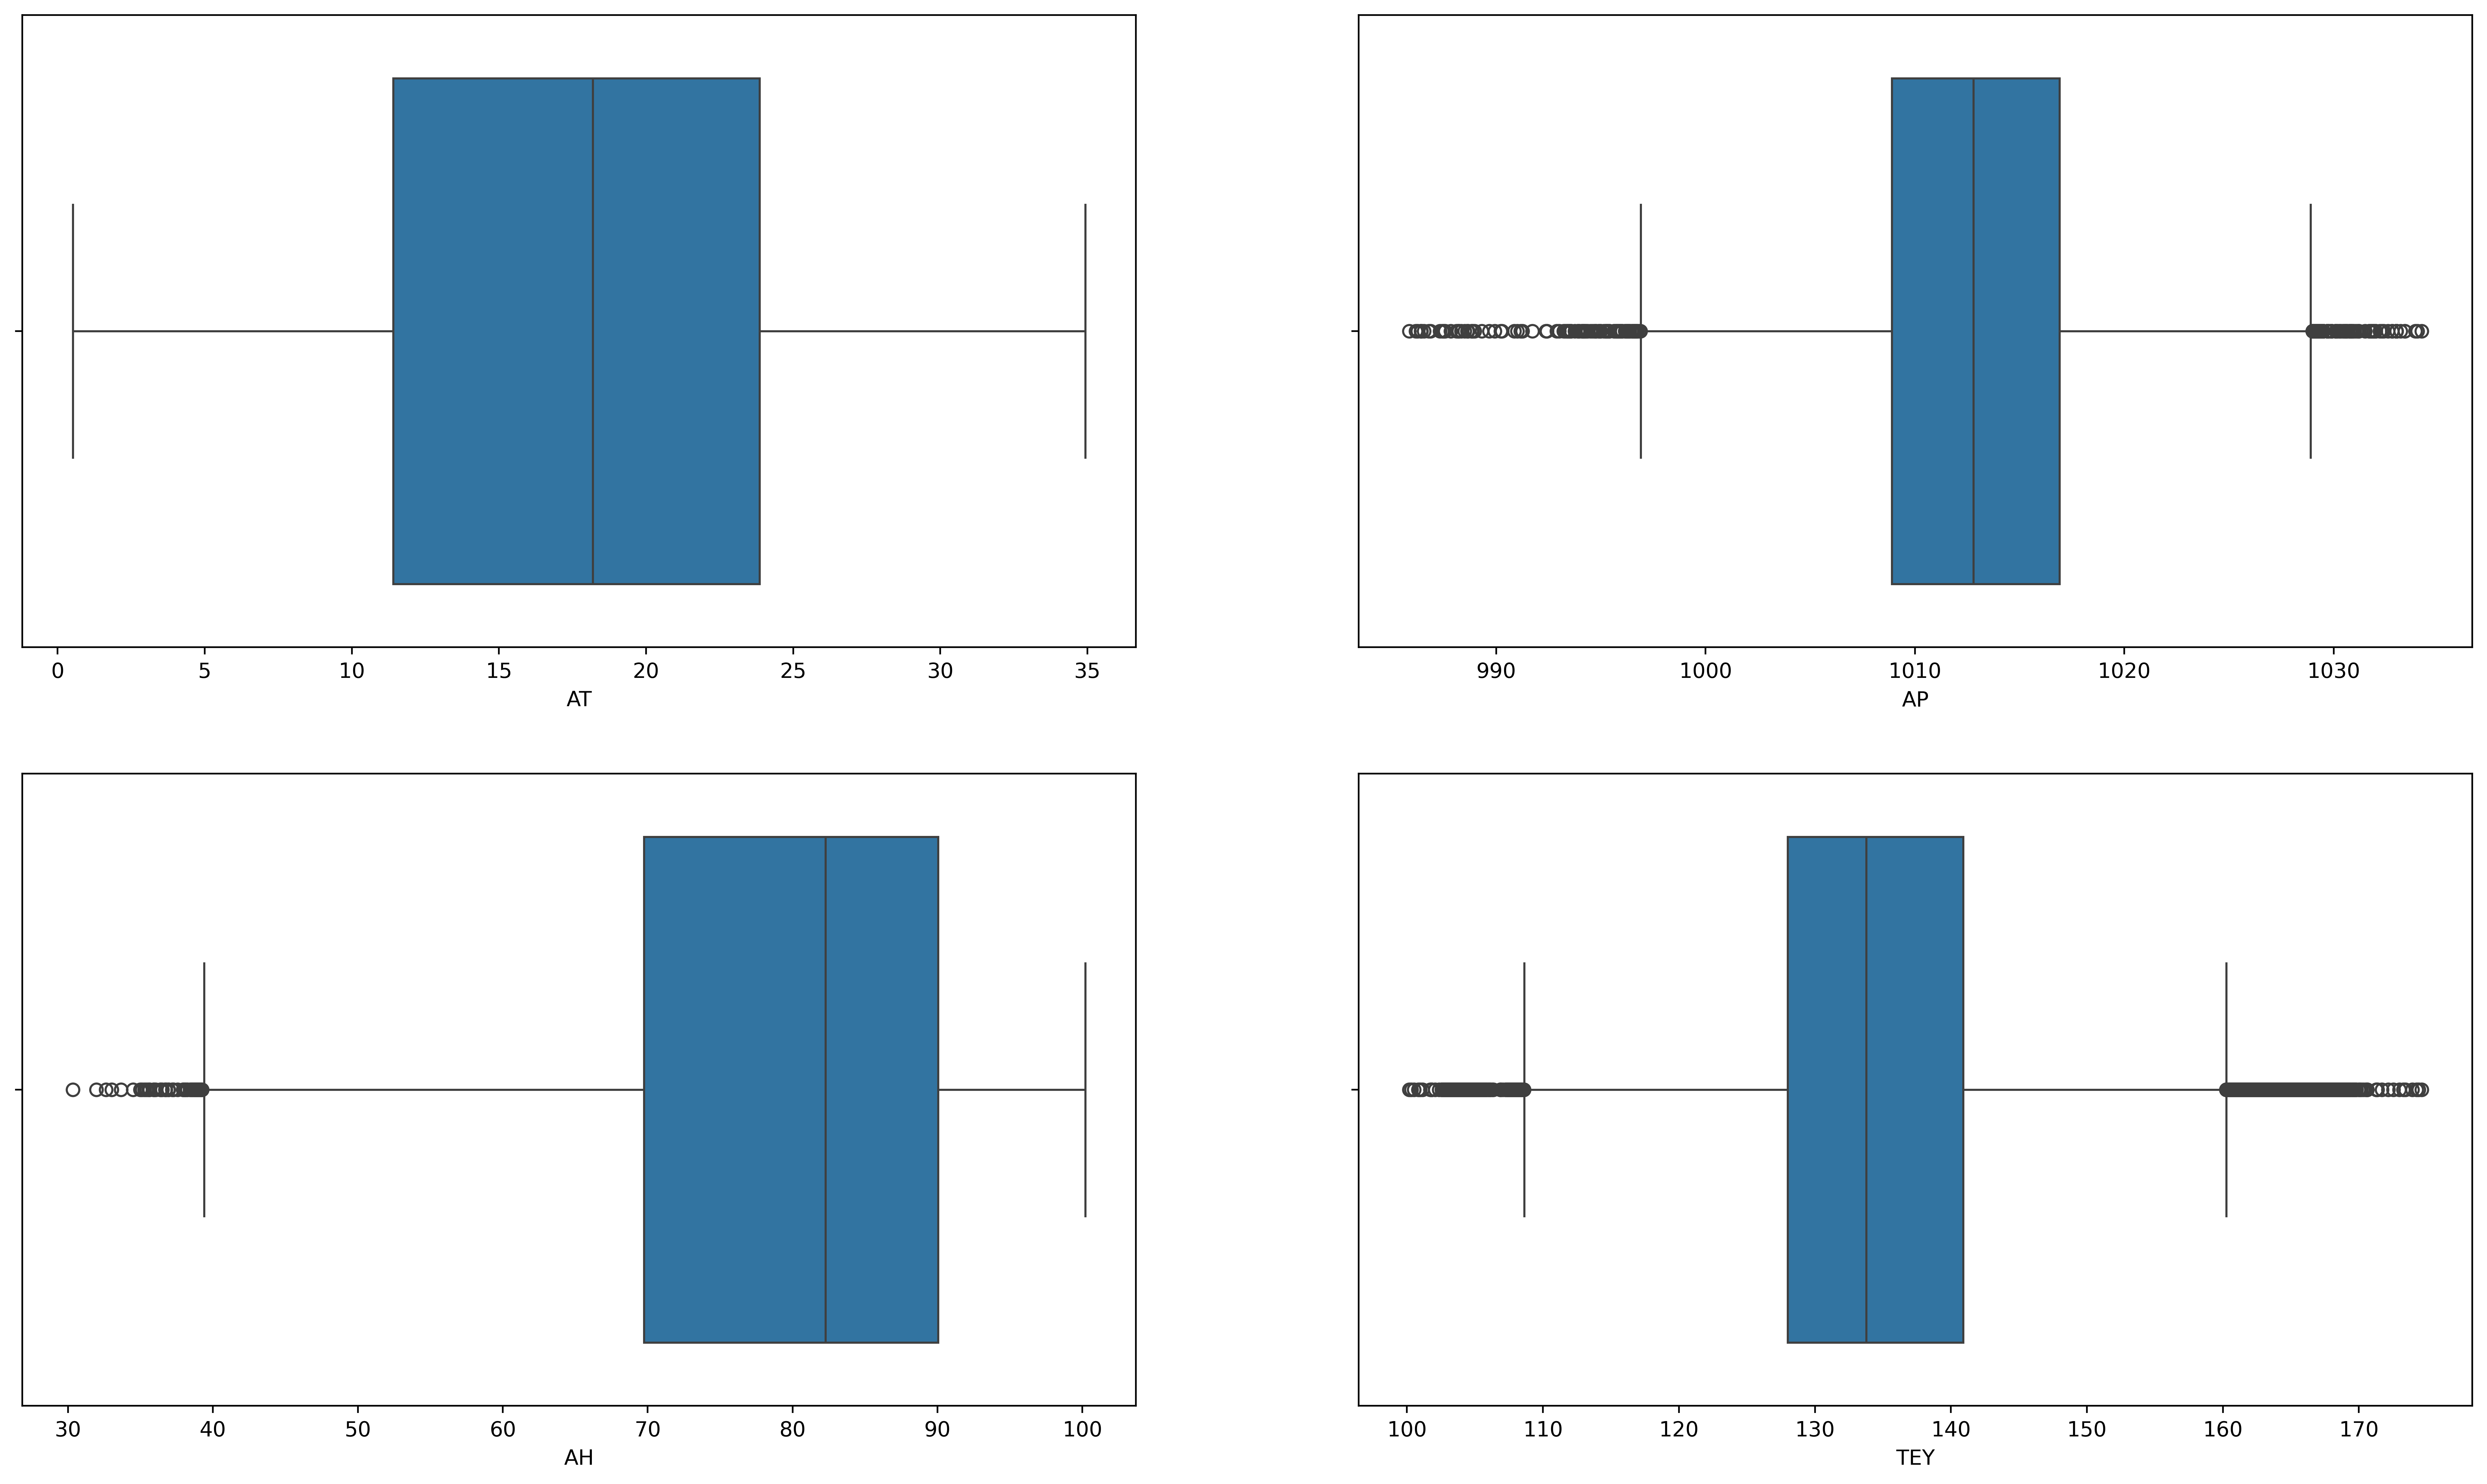

In [7]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(21, 12),dpi=500)
sns.boxplot(x='AT',data=df,ax=axes[0,0])
sns.boxplot(x='AH',data=df,ax=axes[1,0])
sns.boxplot(x='AP',data=df,ax=axes[0,1])
sns.boxplot(x='TEY',data=df,ax=axes[1,1])
plt.show()

Text(0.5, 1.0, 'Histogram of the Target Column')

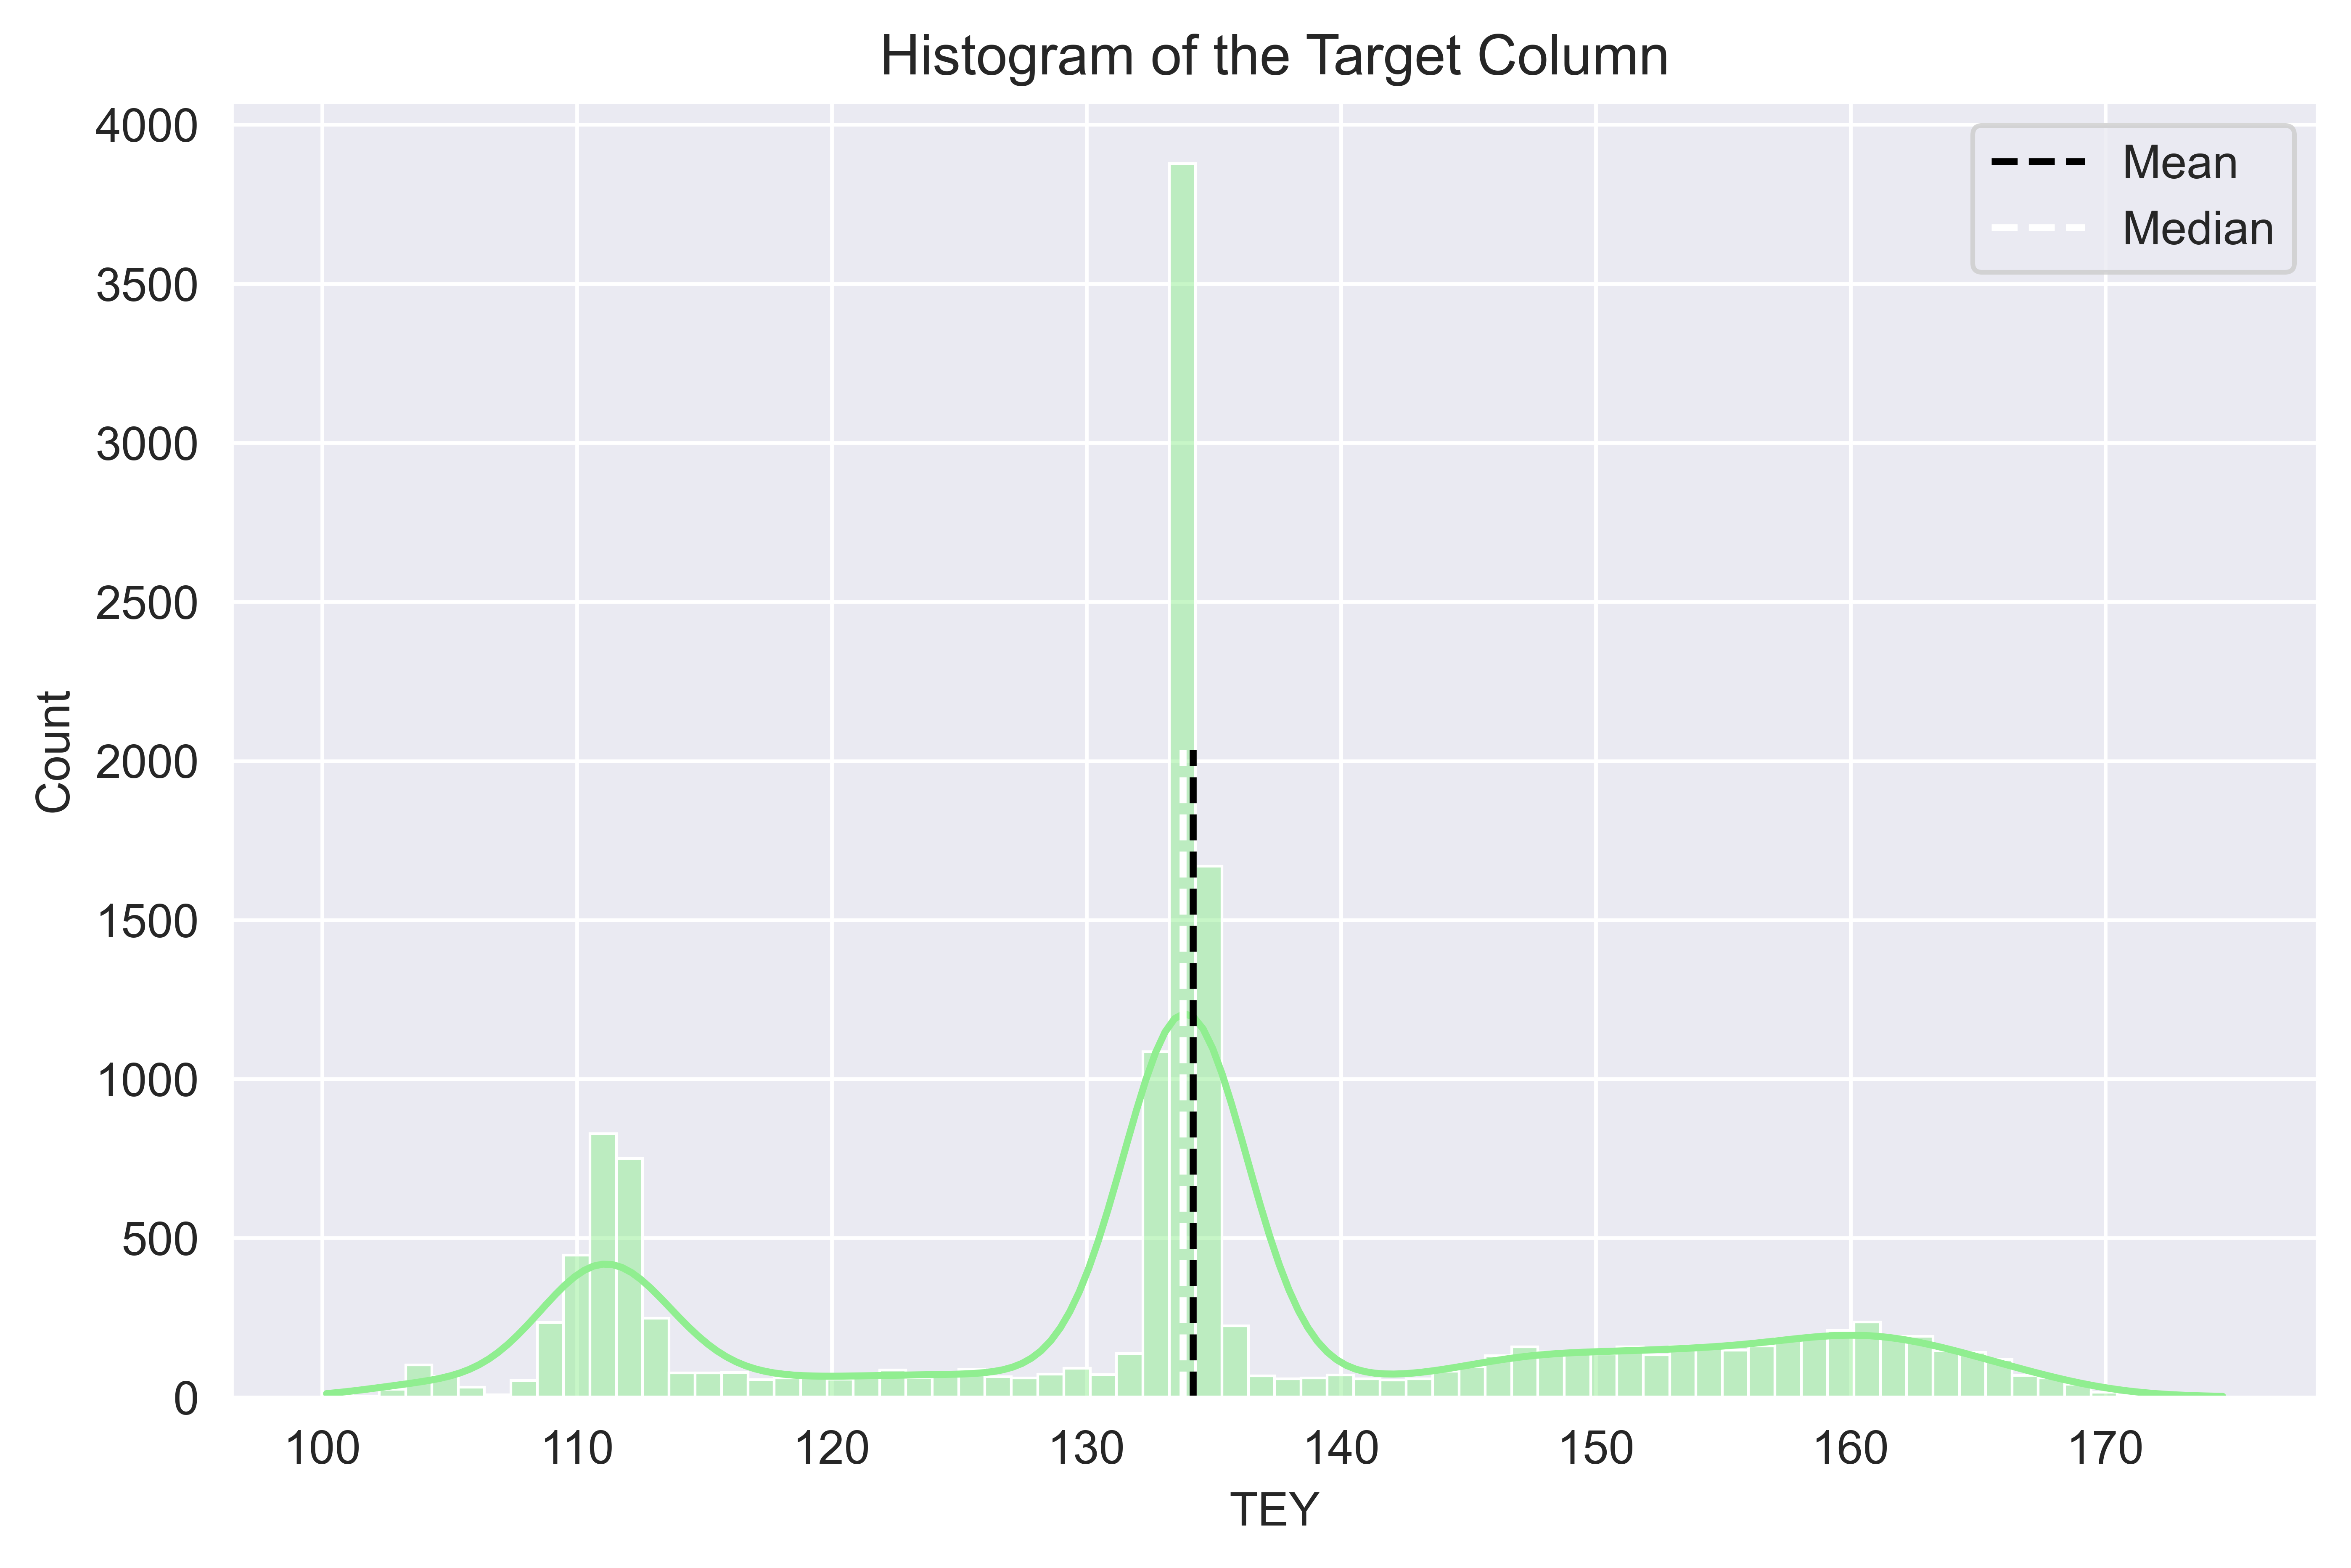

In [8]:
sns.set_style("darkgrid")
plt.figure(figsize=(8,5),dpi=800)
sns.histplot(data=df,x="TEY",color="lightgreen",kde=True)
plt.axvline(x=df["TEY"].mean(),ymax=0.5,color="black",linestyle='--',label="Mean")
plt.axvline(x=df["TEY"].median(),ymax=0.5,color="white",linestyle='--',label="Median")
plt.legend()
plt.title("Histogram of the Target Column")

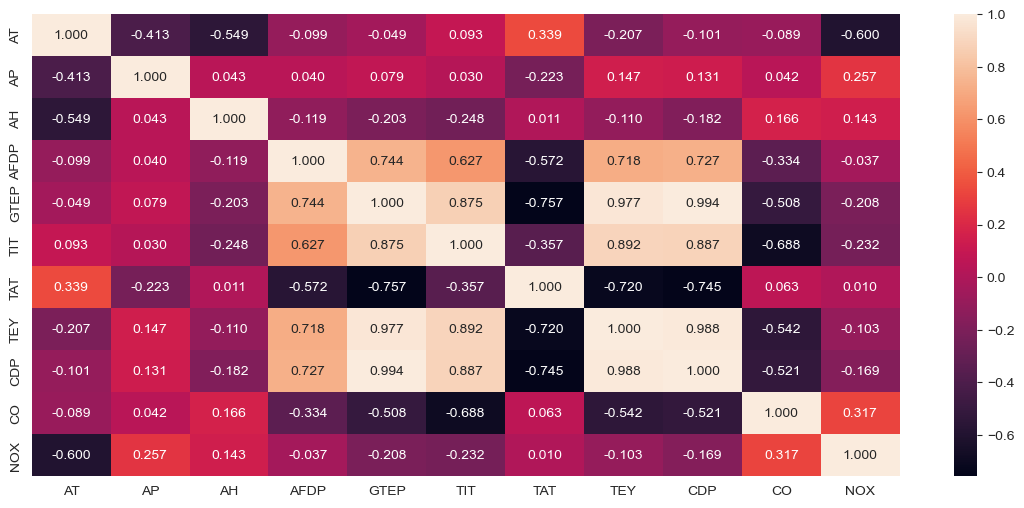

In [9]:
plt.figure(figsize = (14, 6));
sns.heatmap(df.corr(), annot=True, fmt=".3f")
plt.show()

In [10]:
X =df1.iloc[:,:-1]
Y = df1.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.3)

In [11]:
y_train=np.reshape(y_train.to_numpy(), (-1,1))
y_test=np.reshape(y_test.to_numpy(), (-1,1))

In [12]:
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

scaler_x.fit(X_train)
xtrain_scale=scaler_x.transform(X_train)

scaler_x.fit(X_test)
xtest_scale=scaler_x.transform(X_test)

scaler_y.fit(y_train)
ytrain_scale=scaler_y.transform(y_train)

scaler_y.fit(y_test)
ytest_scale=scaler_y.transform(y_test)

In [13]:
len(xtrain_scale)

10527

In [14]:
test = SelectKBest(score_func=mutual_info_regression, k='all')
fit = test.fit(X, Y)

In [15]:
scores = fit.scores_
features = fit.transform(X)

In [16]:
score_df = pd.DataFrame(list(zip(scores, X.columns)), columns =['Score', 'Feature'])
score_df.sort_values(by="Score", ascending=False, inplace=True)
score_df

,Score,Feature
0,0.412217,AT
1,0.138893,AP
2,0.097725,AH


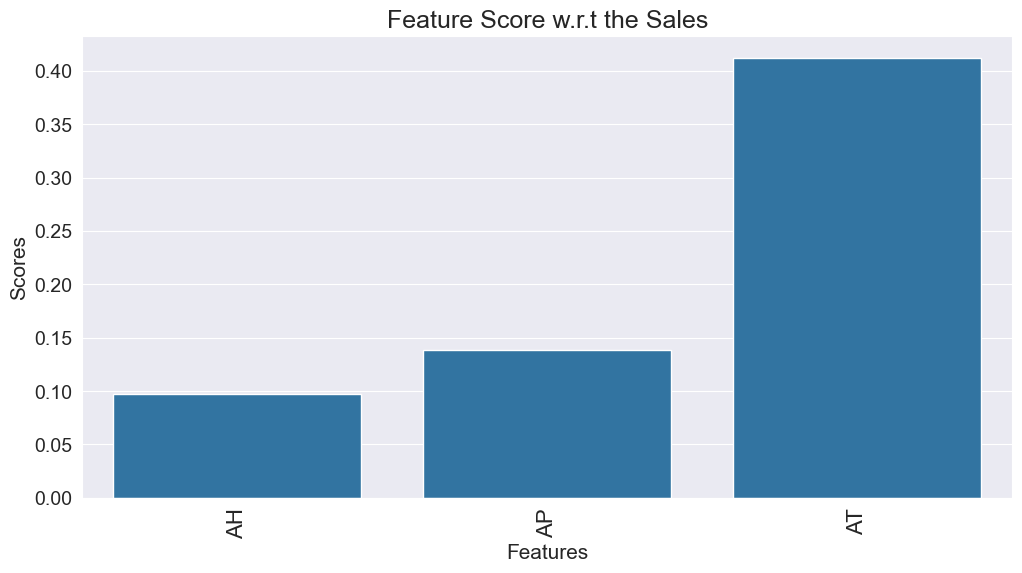

In [17]:
plt.figure(figsize=(12,6))
sns.barplot(x='Feature', y="Score", data=score_df, order=score_df.sort_values('Score').Feature)
plt.xlabel("Features", size=15)
plt.ylabel("Scores", size=15)
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 90, fontsize = 16)
plt.title("Feature Score w.r.t the Sales", size=18)
plt.show()

In [18]:
model = Sequential()
model.add(Dense(4, input_dim=3, kernel_initializer='normal', activation='relu'))
model.add(Dense(2106,kernel_initializer='normal', activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse','mae'])


hist = model.fit(xtrain_scale, ytrain_scale, validation_split=0.33, epochs=100, batch_size=150)



Epoch 1/100


48/48 [==============================] - 2s 12ms/step - loss: 0.0728 - mse: 0.0728 - mae: 0.2061 - val_loss: 0.0478 - val_mse: 0.0478 - val_mae: 0.1590
Epoch 2/100
48/48 [==============================] - 0s 8ms/step - loss: 0.0466 - mse: 0.0466 - mae: 0.1551 - val_loss: 0.0471 - val_mse: 0.0471 - val_mae: 0.1556
Epoch 3/100
48/48 [==============================] - 0s 6ms/step - loss: 0.0464 - mse: 0.0464 - mae: 0.1554 - val_loss: 0.0469 - val_mse: 0.0469 - val_mae: 0.1570
Epoch 4/100
48/48 [==============================] - 0s 6ms/step - loss: 0.0460 - mse: 0.0460 - mae: 0.1552 - val_loss: 0.0467 - val_mse: 0.0467 - val_mae: 0.1582
Epoch 5/100
48/48 [==============================] - 0s 7ms/step - loss: 0.0458 - mse: 0.0458 - mae: 0.1565 - val_loss: 0.0462 - val_mse: 0.0462 - val_mae: 0.1547
Epoch 6/100
48/48 [==============================] - 0s 7ms/step - loss: 0.0454 - mse: 0.0454 - mae: 0.1548 - val_loss: 0.0459 - val_mse: 0.0459 - val_mae: 0.1552
Epoch 7/100
48/48

Epoch 46/100
48/48 [==============================] - 0s 7ms/step - loss: 0.0413 - mse: 0.0413 - mae: 0.1610 - val_loss: 0.0410 - val_mse: 0.0410 - val_mae: 0.1604
Epoch 47/100
48/48 [==============================] - 0s 9ms/step - loss: 0.0407 - mse: 0.0407 - mae: 0.1597 - val_loss: 0.0407 - val_mse: 0.0407 - val_mae: 0.1605
Epoch 48/100
48/48 [==============================] - 0s 7ms/step - loss: 0.0406 - mse: 0.0406 - mae: 0.1595 - val_loss: 0.0407 - val_mse: 0.0407 - val_mae: 0.1609
Epoch 49/100
48/48 [==============================] - 0s 8ms/step - loss: 0.0403 - mse: 0.0403 - mae: 0.1591 - val_loss: 0.0413 - val_mse: 0.0413 - val_mae: 0.1615
Epoch 50/100
48/48 [==============================] - 0s 8ms/step - loss: 0.0408 - mse: 0.0408 - mae: 0.1600 - val_loss: 0.0418 - val_mse: 0.0418 - val_mae: 0.1625
Epoch 51/100
48/48 [==============================] - 0s 7ms/step - loss: 0.0406 - mse: 0.0406 - mae: 0.1606 - val_loss: 0.0407 - val_mse: 0.0407 - val_mae: 0.1615
Epoch 52/100
48/

Epoch 96/100
48/48 [==============================] - 0s 7ms/step - loss: 0.0402 - mse: 0.0402 - mae: 0.1597 - val_loss: 0.0412 - val_mse: 0.0412 - val_mae: 0.1618
Epoch 97/100
48/48 [==============================] - 0s 7ms/step - loss: 0.0405 - mse: 0.0405 - mae: 0.1600 - val_loss: 0.0416 - val_mse: 0.0416 - val_mae: 0.1624
Epoch 98/100
48/48 [==============================] - 0s 7ms/step - loss: 0.0406 - mse: 0.0406 - mae: 0.1605 - val_loss: 0.0406 - val_mse: 0.0406 - val_mae: 0.1607
Epoch 99/100
48/48 [==============================] - 0s 7ms/step - loss: 0.0403 - mse: 0.0403 - mae: 0.1600 - val_loss: 0.0406 - val_mse: 0.0406 - val_mae: 0.1614
Epoch 100/100
48/48 [==============================] - 0s 8ms/step - loss: 0.0402 - mse: 0.0402 - mae: 0.1599 - val_loss: 0.0406 - val_mse: 0.0406 - val_mae: 0.1612


In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 16        
                                                                 
 dense_1 (Dense)             (None, 2106)              10530     
                                                                 
 dense_2 (Dense)             (None, 1)                 2107      
                                                                 
Total params: 12653 (49.43 KB)
Trainable params: 12653 (49.43 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [20]:
model1 = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')])

model1.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae','mse'])

model1.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test))

Epoch 1/50
658/658 [==============================] - 3s 3ms/step - loss: 1099.7111 - mae: 16.5944 - mse: 1099.7111 - val_loss: 246.8366 - val_mae: 11.5771 - val_mse: 246.8366
Epoch 2/50
658/658 [==============================] - 2s 2ms/step - loss: 248.1925 - mae: 11.6686 - mse: 248.1925 - val_loss: 248.5188 - val_mae: 11.7034 - val_mse: 248.5188
Epoch 3/50
658/658 [==============================] - 2s 2ms/step - loss: 243.6178 - mae: 11.6368 - mse: 243.6178 - val_loss: 239.6849 - val_mae: 11.4279 - val_mse: 239.6849
Epoch 4/50
658/658 [==============================] - 2s 3ms/step - loss: 238.8769 - mae: 11.6903 - mse: 238.8769 - val_loss: 231.6610 - val_mae: 11.3821 - val_mse: 231.6610
Epoch 5/50
658/658 [==============================] - 2s 3ms/step - loss: 240.1562 - mae: 11.8772 - mse: 240.1562 - val_loss: 230.9002 - val_mae: 11.3053 - val_mse: 230.9002
Epoch 6/50
658/658 [==============================] - 2s 3ms/step - loss: 241.4612 - mae: 12.0349 - mse: 241.4612 - val_loss: 22

Epoch 48/50
658/658 [==============================] - 2s 2ms/step - loss: 226.1115 - mae: 11.9797 - mse: 226.1115 - val_loss: 226.4897 - val_mae: 11.9325 - val_mse: 226.4897
Epoch 49/50
658/658 [==============================] - 2s 3ms/step - loss: 225.7783 - mae: 11.9691 - mse: 225.7783 - val_loss: 227.0535 - val_mae: 12.0273 - val_mse: 227.0535
Epoch 50/50
658/658 [==============================] - 2s 3ms/step - loss: 225.8856 - mae: 11.9779 - mse: 225.8856 - val_loss: 217.8992 - val_mae: 11.6980 - val_mse: 217.8992


In [21]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 32)                128       
                                                                 
 dense_4 (Dense)             (None, 16)                528       
                                                                 
 dense_5 (Dense)             (None, 1)                 17        
                                                                 
Total params: 673 (2.63 KB)
Trainable params: 673 (2.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [22]:
y_predict = model.predict(xtest_scale)

141/141 [==============================] - 0s 2ms/step


In [23]:
y_pred1 = model1.predict(xtest_scale)

141/141 [==============================] - 0s 1ms/step


In [24]:
print(hist.history.keys())

dict_keys(['loss', 'mse', 'mae', 'val_loss', 'val_mse', 'val_mae'])


In [25]:
hist_df = pd.DataFrame(hist.history)
hist_df["epoch"]=hist.epoch
hist_df.tail()

,loss,mse,mae,val_loss,val_mse,val_mae,epoch
95,0.040192,0.040192,0.159679,0.041240,0.041239,0.161751,95
96,0.040498,0.040498,0.160050,0.041582,0.041582,0.162371,96
97,0.040561,0.040561,0.160469,0.040609,0.040609,0.160674,97
98,0.040253,0.040253,0.159985,0.040596,0.040596,0.161417,98
99,0.040246,0.040246,0.159870,0.040595,0.040595,0.161153,99
